In [1]:
# OM

## Boombikes Linear Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
boom = pd.read_csv('../data/day.csv')
boom.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Cleaning up data to make it meaningful

In [4]:
boom['season'].replace(1,'spring',inplace=True)
boom['season'].replace(2,'summer',inplace=True)
boom['season'].replace(3,'fall',inplace=True)
boom['season'].replace(4,'winter',inplace=True)

In [5]:
boom['season'].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [6]:
boom['yr'].replace(0,'2018',inplace=True)
boom['yr'].replace(1,'2019',inplace=True)

In [7]:
boom['workingday'].replace(1,'weekend/holiday',inplace=True)
boom['workingday'].replace(0,'regular day',inplace=True)

In [8]:
boom.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,1,0,6,regular day,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,1,0,0,regular day,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,1,0,1,weekend/holiday,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,1,0,2,weekend/holiday,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,1,0,3,weekend/holiday,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
boom['mnthyr'] = pd.to_datetime(boom.dteday).dt.to_period('m')
boom=boom.drop(['dteday','instant','casual','registered'],axis=1)

In [10]:
boom.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,mnthyr
0,spring,2018,1,0,6,regular day,2,14.110847,18.18125,80.5833,10.749882,985,2018-01
1,spring,2018,1,0,0,regular day,2,14.902598,17.68695,69.6087,16.652113,801,2018-02


In [11]:
boom['mnthyr']=boom['mnthyr'].astype('object')

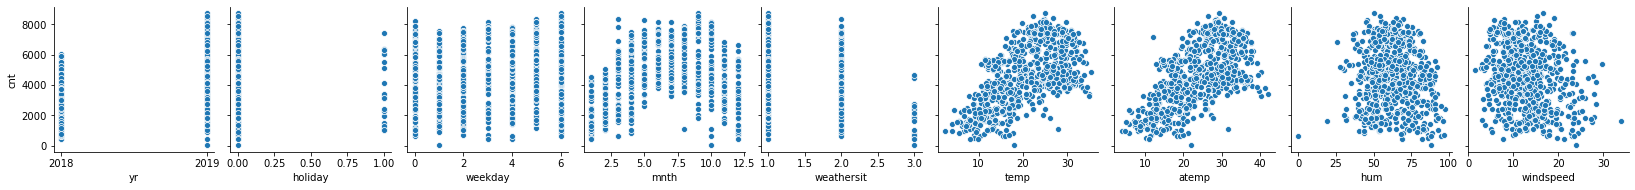

In [12]:
sns.pairplot(data=boom,x_vars=['yr','holiday','weekday','mnth','weathersit','temp','atemp','hum','windspeed'],y_vars=['cnt'])

### Lets analyse categorical variables with demand now

In [13]:
# weathersit can be converted to meaningful categories
boom['weathersit'].replace(1,'Clear Weather',inplace=True)
boom['weathersit'].replace(2,'Misty/Cloudy',inplace=True)
boom['weathersit'].replace(3,'Light Rains/Clouds/Snow',inplace=True)
boom['weathersit'].replace(4,'Heavy Rains/Fog/Snow/TS',inplace=True)

#### From the above pairplots we can observe the following
- Count of no of people using boom bikes have increased from 2018 to 2019
- Boombikes have been used more during holidays
- Coming to which day of week, more often it was used, demand is same on all days
- Monthwise we can observe, it was used less from Jan to May, but rest months its demand was good
- Weather wise impact is that, boombikes are most often used when weather is clear, demand is also good when there is mist or cloudy. But demands drops when there is light rain or heavy rain.
- As the temp increases the demand for the bikes increases
- Humidity and windspeed have no impact on demand at all

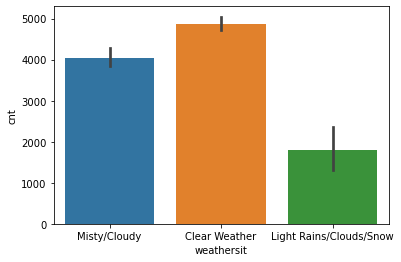

In [14]:
sns.barplot(x=boom['weathersit'],y=boom['cnt'])
plt.show()

In [15]:
boom[boom['weathersit']=='Heavy Rains/Fog/Snow/TS']

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,mnthyr


- We can see that bikes are being used more often only in Clear weather and misty/cloudy weather
- Very few instances its being used during Light rains
- And never is bike hired during Heavy rain / Fog or Snow

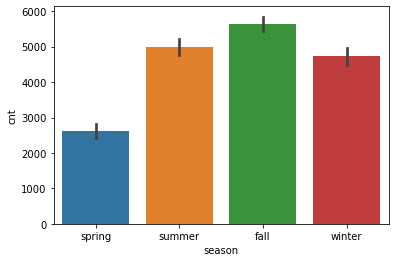

In [16]:
sns.barplot(x=boom['season'],y=boom['cnt'])

- It is observed that during fall, the demand for boombikes increases and during spring its very less

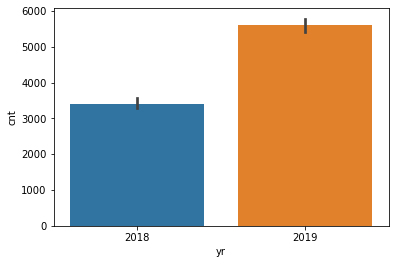

In [17]:
sns.barplot(x=boom['yr'],y=boom['cnt'])

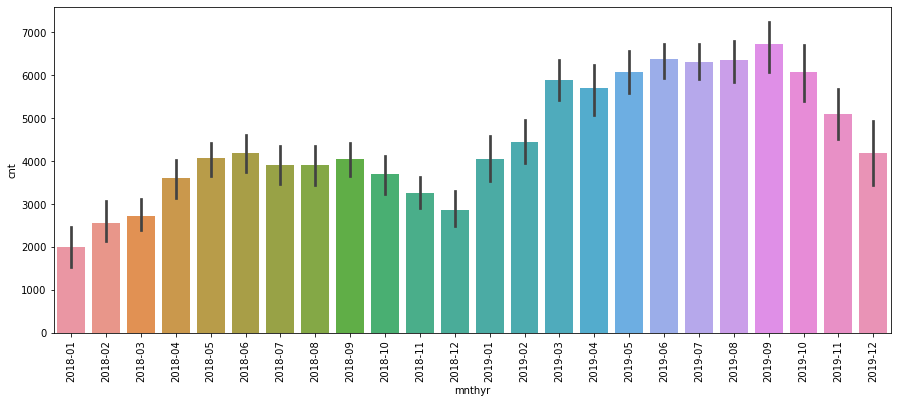

In [18]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
sns.barplot(x=boom['mnthyr'],y=boom['cnt'])

- generally demand has increased in 2019 compared to 2018
- and mainly during the mid year that is from may to october the demands increases

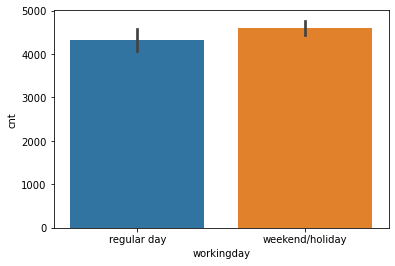

In [19]:
sns.barplot(x=boom['workingday'],y=boom['cnt'])

- During weekend or holiday demand is slightly more, not big diff

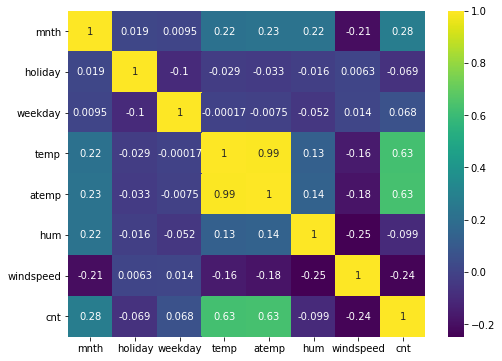

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(boom.corr(),annot=True,cmap='viridis')

- More registered users add to more demand than casual users
- Temperature plays a major role in people hiring rental bikes
- Weather situation has negative impact on demand, meaning better the weather, more the demand

In [21]:
boom['season'].replace('spring',1,inplace=True)
boom['season'].replace('summer',2,inplace=True)
boom['season'].replace('fall',3,inplace=True)
boom['season'].replace('winter',4,inplace=True)
boom['yr'].replace('2018',0,inplace=True)
boom['yr'].replace('2019',1,inplace=True)
boom['workingday'].replace('weekend/holiday',0,inplace=True)
boom['workingday'].replace('regular day',1,inplace=True)

In [22]:
# Convert season to one hot encoded values
onehotenc = pd.get_dummies(boom['season'],drop_first=True)

In [23]:
boom = boom.join(onehotenc)
#boom['season_spring'] =boom[1]
boom['season_summer'] =boom[2]
boom['season_fall'] =boom[3]
boom['season_winter'] =boom[4]
boom = boom.drop(['season',2,3,4],axis=1)
boom.head(2)

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,mnthyr,season_summer,season_fall,season_winter
0,0,1,0,6,1,Misty/Cloudy,14.110847,18.18125,80.5833,10.749882,985,2018-01,0,0,0
1,0,1,0,0,1,Misty/Cloudy,14.902598,17.68695,69.6087,16.652113,801,2018-02,0,0,0


In [24]:
boom['workingday'].unique()

array([1, 0], dtype=int64)

In [25]:
# weathersit can be converted to meaningful categories
boom['weathersit'].replace('Clear Weather',1,inplace=True)
boom['weathersit'].replace('Misty/Cloudy',2,inplace=True)
boom['weathersit'].replace('Light Rains/Clouds/Snow',3,inplace=True)
boom['weathersit'].replace('Heavy Rains/Fog/Snow/TS',4,inplace=True)

In [26]:
onehotenc1 = pd.get_dummies(boom['weathersit'],drop_first=True)
boom = boom.join(onehotenc1)
#boom['weather_sit_clear'] = boom[1]
boom['weather_sit_misty_cloudy'] = boom[2]
boom['weather_sit_lightrain'] = boom[3]
#boom['weather_sit_heavyrain'] = boom[4]
boom = boom.drop([2,3,'weathersit'],axis=1)
boom.head(2)

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,mnthyr,season_summer,season_fall,season_winter,weather_sit_misty_cloudy,weather_sit_lightrain
0,0,1,0,6,1,14.110847,18.18125,80.5833,10.749882,985,2018-01,0,0,0,1,0
1,0,1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,2018-02,0,0,0,1,0


In [27]:
boom=boom.drop(['mnthyr'],axis=1)
boom.head(2)

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,season_winter,weather_sit_misty_cloudy,weather_sit_lightrain
0,0,1,0,6,1,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0
1,0,1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0


In [28]:
ohe_enc2 = pd.get_dummies(boom['weekday'],drop_first=True)
boom = boom.join(ohe_enc2)

#boom['weekday_sunday'] = boom[0]
boom['weekday_monday'] = boom[1]
boom['weekday_tuesday'] = boom[2]
boom['weekday_wedday'] = boom[3]
boom['weekday_thuday'] = boom[4]
boom['weekday_friday'] = boom[5]
boom['weekday_satday'] = boom[6]

boom = boom.drop(['weekday',1,2,3,4,5,6],axis=1)
boom.head(2)

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,season_winter,weather_sit_misty_cloudy,weather_sit_lightrain,weekday_monday,weekday_tuesday,weekday_wedday,weekday_thuday,weekday_friday,weekday_satday
0,0,1,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,1
1,0,1,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0


### Now the dataset is completely numerical after encoding

## MODEL BUILDING

In [29]:
X = boom.drop(['cnt'],axis=1)
y = boom['cnt']

In [30]:
X.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,season_summer,season_fall,season_winter,weather_sit_misty_cloudy,weather_sit_lightrain,weekday_monday,weekday_tuesday,weekday_wedday,weekday_thuday,weekday_friday,weekday_satday
0,0,1,0,1,14.110847,18.18125,80.5833,10.749882,0,0,0,1,0,0,0,0,0,0,1
1,0,1,0,1,14.902598,17.68695,69.6087,16.652113,0,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,8.050924,9.47025,43.7273,16.636703,0,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,8.200000,10.60610,59.0435,10.739832,0,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,9.305237,11.46350,43.6957,12.522300,0,0,0,0,0,0,0,1,0,0,0


In [31]:
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)

In [33]:
print(X_train.shape,y_train.shape)

(510, 19) (510,)


In [34]:
print(X_test.shape,y_test.shape)

(220, 19) (220,)


In [35]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm).fit()

lr.params

const                       1458.283209
yr                          2016.519001
mnth                          12.245082
holiday                     -548.150664
workingday                  -185.896039
temp                         115.479878
atemp                         13.260286
hum                          -11.549003
windspeed                    -49.819684
season_summer               1011.529484
season_fall                  603.930992
season_winter               1325.925865
weather_sit_misty_cloudy    -492.250645
weather_sit_lightrain      -2157.937732
weekday_monday               118.447114
weekday_tuesday              148.356631
weekday_wedday               283.266867
weekday_thuday               235.491154
weekday_friday               310.466819
weekday_satday               487.845559
dtype: float64

In [36]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     136.9
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          3.97e-178
Time:                        23:36:43   Log-Likelihood:                -4129.2
No. Observations:                 510   AIC:                             8296.
Df Residuals:                     491   BIC:                             8377.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## Observations from Model Summary

- We can see that R-squared value is 83.4 and adj R-square is 82.8 which are both good scored
- We can see that p-value also is good for all the columns or features
- P-value is less than 0.05 which indicates our model is significant

### Model Validation using Test Dataframes

In [37]:
X_test_sm = sm.add_constant(X_test)
lr_test = sm.OLS(y_test,X_test_sm).fit()

In [38]:
print(lr_test.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     55.63
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           7.24e-68
Time:                        23:36:43   Log-Likelihood:                -1776.4
No. Observations:                 220   AIC:                             3591.
Df Residuals:                     201   BIC:                             3655.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## Observations:
- R2 and Adjusted R2 for test is almost same as train data
- P-value also is less than 0.05

In [40]:
y_pred = lr_test.predict(X_test_sm)
residual = y_test - y_pred

### Plotting residuals

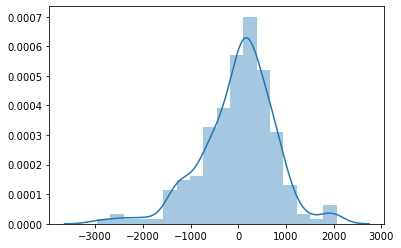

In [41]:
import seaborn as sns
sns.distplot(residual)

- Error (residuals) is normally distributed which is good

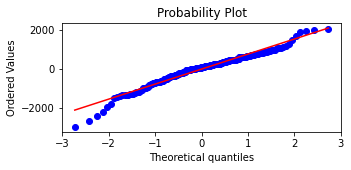

In [42]:
from scipy import stats
fig,ax = plt.subplots(figsize=(5,2))
_, (__, __, r) = stats.probplot(residual,plot=ax,fit=True)

## R2 Score and mean squared error

In [43]:
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
print('Mean squared error: ',mean_squared_error(y_test,y_pred))
print('Coeff of determination: ',r2_score(y_test,y_pred))

Mean squared error:  603859.7200787705
Coeff of determination:  0.8328374413127542


## *********** DONE ***************